In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import requests
import json
from PIL import Image, ImageDraw
from urllib.request import urlopen
from bs4 import BeautifulSoup
from mplsoccer import FontManager
from fotmob import scraperFotmob
from sofascore import scraperSofaScore
from functions import functions_horizontal as fh

warnings.filterwarnings("ignore", category=FutureWarning)

In [552]:
# rutas del archivo
# ruta_archivo_champion = "../data/fotmob/champions/CHAMPIONSLEAGUE_REALMADRID_LEIPZIG.json"
# ruta_archivo_champion_sofascore = "../data/sofascore/champions/CHAMPIONSLEAGUE_REALMADRID_LEIPZIG_SOFASCORE.json"

# ruta_archivo_europa = "../data/europa_league/EUROPALEAGUE_FRIBURGO_WESTHAM.json"
# ruta_archivo_europa_sofascore = "../data/europa_league/EUROPALEAGUE_FRIBURGO_WESTHAM_SOFASCORE.json"

# ruta_archivo_conference = "../data/conference_league/CONFERENCELEAGUE_MACCABI_FIORENTINA.json"
# ruta_archivo_conference_sofascore = "../data/conference_league/CONFERENCELEAGUE_MACCABI_FIORENTINA_SOFASCORE.json"

# ruta_archivo_premier = '../data/premier_league/PREMIERLEAGUE_LIVERPOOL_CITY.json'
# ruta_archivo_premier_sofascore = '../data/premier_league/PREMIERLEAGUE_LIVERPOOL_CITY_SOFASCORE.json'

# ruta_archivo_seriea = '../data/serieA/SERIEA_FIORENTINA_ROMA.json'
# ruta_archivo_seriea_sofascore = '../data/serieA/SERIEA_FIORENTINA_ROMA_SOFASCORE.json'

# ruta_archivo_laliga = '../data/la_liga/LALIGA_BETIS_VILLARREAL.json'
# ruta_archivo_laliga_sofascore = '../data/la_liga/LALIGA_BETIS_VILLARREAL_SOFASCORE.json'

ruta_archivo_bundesliga = '../data/fotmob/bundesliga/BUNDESLIGA_LEVERKUSEN_WOLFSBURG.json'
ruta_archivo_bundesliga_sofascore = '../data/sofascore/bundesliga/BUNDESLIGA_LEVERKUSEN_WOLFSBURG_SOFASCORE.json'

# ruta_archivo_eredivisie = '../data/eredivisie/EREDIVISIE_FEYENOORD_HERACLES.json'
# ruta_archivo_eredivisie_sofascore = '../data/eredivisie/EREDIVISIE_FEYENOORD_HERACLES_SOFASCORE.json'

In [553]:
match_id = '4222131'
match_id_sofascore = '11396259'
url_sofascore = 'https://www.sofascore.com/bayer-04-leverkusen-vfl-wolfsburg/zabsGdb#id:11396259'

In [554]:
scraper = scraperFotmob(match_id)
sofascore = scraperSofaScore(match_id_sofascore)

In [555]:
json_fotmob = scraper.get_json()
json_sofascore = sofascore.get_json()

In [556]:
scraper.save_json(ruta_archivo_bundesliga, json_fotmob)
sofascore.save_json(ruta_archivo_bundesliga_sofascore, json_sofascore)

In [557]:
json_data = scraper.open_json(ruta_archivo_bundesliga)
json_data_sofascore = sofascore.open_json(ruta_archivo_bundesliga_sofascore)

In [558]:
sofascore_colors = sofascore.get_headers(url_sofascore)

In [559]:
# colores de los equipos
colors = scraper.colors_teams(json_data)
colors, fonts = colors[0], colors[1]
color_home, color_away = colors[0], colors[1]
font_home, font_away = fonts[0], fonts[1]

In [560]:
# informacion del partido
info_match =  scraper.get_info_match(json_data)
league, round_match, country, home, away, day, referee, stadium, city_stadium = info_match[0], info_match[1], info_match[2], info_match[3], info_match[4], info_match[5], info_match[6], info_match[7], info_match[8]

In [561]:
# nombre de local y visita
home_name = home['name']
away_name = away['name']
id_home = home['id']
id_away = away['id']

In [562]:
# score e imagenes
image_score = scraper.score_image(json_data)
image_score_home, image_score_away = image_score[0], image_score[1]
score_home, image_home_url = image_score_home[0], image_score_home[1]
score_away, image_away_url = image_score_away[0], image_score_away[1]

In [563]:
match = sofascore.get_players_match_stats(match_id_sofascore, home_name, away_name)
match_home, match_away = match[0], match[1]

match_home = match_home.fillna(0)
match_away = match_away.fillna(0) 

players = sofascore.get_stats_featured_players(match_home, match_away)
player_home, player_away = players[0], players[1]

In [564]:
player_home

name           Exequiel Palacios
id                        822600
rating                       9.1
shirtNumber                   25
Name: 6, dtype: object

In [565]:
player_away

name           Koen Casteels
id                     70987
rating                   7.9
shirtNumber                1
Name: 0, dtype: object

In [566]:
info_player_home = sofascore.get_info_featured_player_home(match_home)
# info_player_home = sofascore.get_info_featured_arquero(match_home)
# info_player_away = sofascore.get_info_featured_player_away(match_away)
info_player_away = sofascore.get_info_featured_arquero(match_away)

In [567]:
info_player_home

name                  Exequiel Palacios
minutesPlayed                      89.0
goals                               0.0
expectedAssists                0.459682
accuratePass                      142.0
keyPass                             3.0
accurateLongBalls                   7.0
possessionLostCtrl                  6.0
touches                           157.0
aerialWon                           0.0
rating                              9.1
totalTackle                         3.0
duelWon                             3.0
fouls                               0.0
team                   Bayer Leverkusen
Name: 6, dtype: object

In [568]:
image_players = sofascore.get_image_players(player_home[1], player_away[1])
image_player_home, image_player_away = image_players[0], image_players[1]

In [569]:
# minutos del partido
minutos_match = scraper.get_minute_goals(json_data)

# match momentum del partido
match_momentum = scraper.get_match_momentum(json_data, minutos_match)
match_momentum_local, match_momentum_visit, df_goles_match = match_momentum[0], match_momentum[1], match_momentum[2]

In [570]:
# estadisticas del partido
stadistics_match = scraper.get_stadistics_match(json_data)
ball_possession, xg_match, shot_match, target_match, big_chances_match, big_chances_missed_match, passes_match, fouls_match, corner_match, shots_blocked, shots_poste, shots_inside, shots_outside, long_ball, touches_in_box, offsides, tackles, bloqueos, saves, duelos, aereos, dribbles, yellow_card, red_card = stadistics_match[0], stadistics_match[1], stadistics_match[2], stadistics_match[3], stadistics_match[4], stadistics_match[5], stadistics_match[6], stadistics_match[7], stadistics_match[8], stadistics_match[9], stadistics_match[10], stadistics_match[11], stadistics_match[12], stadistics_match[13], stadistics_match[14], stadistics_match[15], stadistics_match[16], stadistics_match[17], stadistics_match[18], stadistics_match[19], stadistics_match[20], stadistics_match[21], stadistics_match[22], stadistics_match[23]

# posesion del partido
posesion = np.array(ball_possession['stats'])
posesion = np.array(posesion)
total_value = np.sum(posesion)
ratios = np.true_divide(posesion, total_value)
widths_possession = [ratio * 100 for ratio in ratios]

In [571]:
xgs_match = xg_match['stats'] # goles esperados
shots_match = shot_match['stats'] # tiros
corners_match = corner_match['stats'] # corners
offsides_match = offsides['stats'] # fuera de juego
yellow_cards = yellow_card['stats'] # tarjetas amarillas
red_cards = red_card['stats'] # tarjetas rojas

In [572]:
targets_match = target_match['stats'] # tiros a puerta
foul_match = fouls_match['stats'] # faltas
pass_match = passes_match['stats'] # pases
ball_long = long_ball['stats'] # balones largos
won_duel = duelos['stats'] # duelos ganados
dribble_match = dribbles['stats'] # regates

In [573]:
# tiros
df_tiros = pd.DataFrame(json_data['props']['pageProps']['content']['shotmap']['shots'])

In [574]:
coord_tiros = sofascore.get_coord_tiros(df_tiros, id_home, id_away)
coord_x_goal_home, coord_y_goal_home, coord_x_goal_away, coord_y_goal_away, coord_x_nogoal_home, coord_y_nogoal_home, coord_x_nogoal_away, coord_y_nogoal_away = coord_tiros[0], coord_tiros[1], coord_tiros[2], coord_tiros[3], coord_tiros[4], coord_tiros[5], coord_tiros[6], coord_tiros[7]

In [575]:
# ids de los jugadores destacados y del partido
ids_heatmap = sofascore.get_ids_heatmap(json_data_sofascore, player_home, player_away)
player_id_home, player_id_away = ids_heatmap[0], ids_heatmap[1]

In [576]:
player_id_home, player_id_away

(822600, 70987)

In [577]:
# mapas de calor
heatmap_players = sofascore.get_heatmap_players(match_id_sofascore, player_id_home, player_id_away)
heatmap_home, heatmap_away = heatmap_players[0], heatmap_players[1]

In [578]:
# mapa de tiros
mapa_tiros = sofascore.get_mapa_tiros(match_id_sofascore)

# xG
xg_match = sofascore.get_xg_match(mapa_tiros)
goals_home, goals_away, home_xG, away_xG = xg_match[0], xg_match[1], xg_match[2], xg_match[3]

KeyError: "['addedTime'] not in index"

In [29]:
nombre = FontManager('https://github.com/google/fonts/blob/main/ofl/comicneue/ComicNeue-Bold.ttf?raw=true')
equipos = FontManager('https://github.com/google/fonts/blob/main/ofl/abeezee/ABeeZee-Regular.ttf?raw=true')
cuerpo = FontManager('https://github.com/google/fonts/blob/main/ofl/dmsans/DMSans%5Bopsz%2Cwght%5D.ttf?raw=true')
pie = FontManager('https://github.com/google/fonts/blob/main/ofl/barlow/Barlow-Medium.ttf?raw=true')

In [579]:
colores = [f'{color_home}', f'{color_away}']

# Instagram

## 15:9

In [580]:
def make_circular_image_with_border(image, border_width=5, border_color=(0, 0, 0)):
    mask = Image.new("L", image.size, 0)
    draw = ImageDraw.Draw(mask)
    width, height = image.size
    draw.ellipse((0, 0, width, height), fill=255)

    result = Image.new("RGBA", image.size)
    result.paste(image, (0, 0), mask)

    draw = ImageDraw.Draw(result)
    draw.ellipse((0, 0, width, height), outline=border_color, width=border_width)

    return result

In [581]:
# Convertir las imágenes a circulares
image_player_home = make_circular_image_with_border(image_player_home)
image_player_away = make_circular_image_with_border(image_player_away)

In [326]:
# home_name = home_name.split()[0]
away_name = away_name.split()[0]

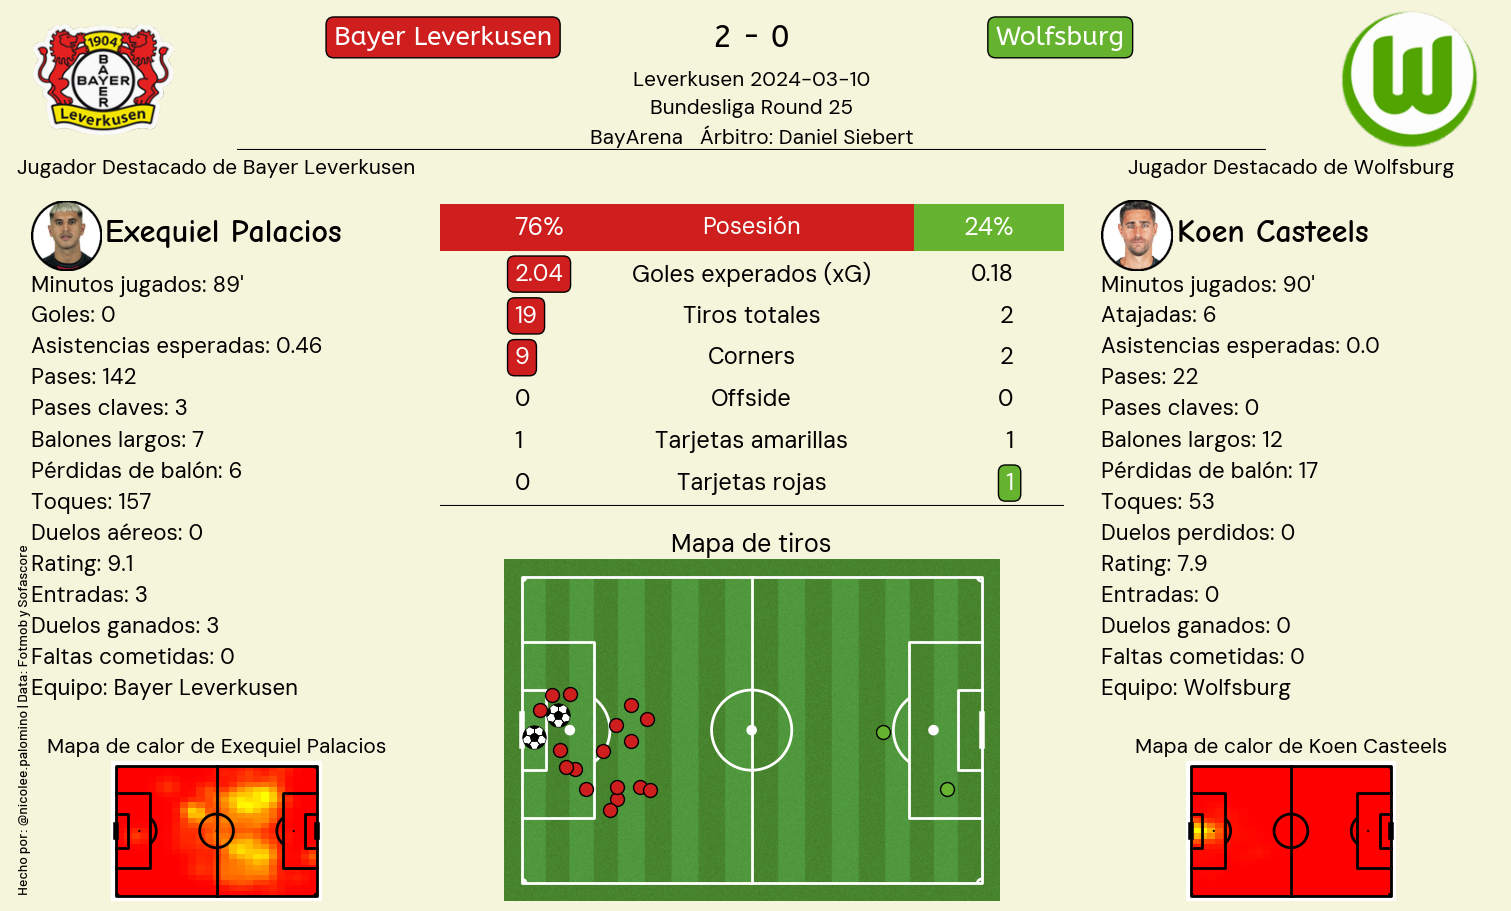

In [582]:
fig = plt.figure(figsize=(15,9),constrained_layout=True)
gs = fig.add_gridspec(nrows=5,ncols=7)
fig.set_facecolor('beige')

# Escudo local
ax1 = fig.add_subplot(gs[:1, :1])
fh.get_image_escudo(ax1, image_home_url)
fh.color_ax(ax1)
fh.sacar_spines(ax1)

# Informacion del partido
ax2 = fig.add_subplot(gs[:1, 1:6])
fh.get_information_horizontal(ax2, equipos, cuerpo, color_home, color_away, home_name, away_name, score_home, score_away, city_stadium, league, round_match, day, stadium, referee)
fh.color_ax(ax2)
ax2.axhline(.0, color='black', linestyle='solid')
fh.sacar_spines(ax2)

# Escudo visitante
ax5 = fig.add_subplot(gs[:1, 6:7])
fh.get_image_escudo(ax5, image_away_url)
fh.color_ax(ax5)
fh.sacar_spines(ax5)

# Jugador local
ax6 = fig.add_subplot(gs[1:4, :2])
ax6.set_title(f'Jugador Destacado de {home_name}', fontproperties=cuerpo.prop, size=15)
ax6_inset = ax6.inset_axes([.05, 0.82, 0.17, 0.15])
fh.get_jugador_destacado_local(ax6, info_player_home, nombre, cuerpo)
# fh.get_jugador_destacado_arquero(ax6, info_player_home, nombre, cuerpo)
fh.get_image_jug(ax6_inset, image_player_home)
fh.color_ax(ax6)
fh.color_ax(ax6_inset)
fh.sacar_spines(ax6)
fh.sacar_spines(ax6_inset)

# Estadisticas del partido
ax7 = fig.add_subplot(gs[1:3, 2:5])
fh.get_estadisticas_match(ax7, cuerpo, widths_possession, posesion, colores, xgs_match, shots_match, corners_match, offsides_match, yellow_cards, red_cards, colors[0], colors[1], total_value)
fh.color_ax(ax7)
fh.sacar_spines(ax7)
ax7.axhline(-.7, color='black', linestyle='solid')

# Jugador visitante
ax8 = fig.add_subplot(gs[1:4, 5:7])
ax8.set_title(f'Jugador Destacado de {away_name}', fontproperties=cuerpo.prop, size=15)
ax8_inset = ax8.inset_axes([.05, 0.82, 0.17, 0.15])
# fh.get_jugador_destacado_visit(ax8, info_player_away, nombre, cuerpo)
fh.get_jugador_destacado_arquero(ax8, info_player_away, nombre, cuerpo)
fh.get_image_jug(ax8_inset, image_player_away)
fh.color_ax(ax8)
fh.color_ax(ax8_inset)
fh.sacar_spines(ax8)
fh.sacar_spines(ax8_inset)

# mapa de tiros
ax9 = fig.add_subplot(gs[3:5, 2:5])
ax9.set_title('Mapa de tiros', fontproperties=cuerpo.prop, size=18)
fh.get_campo_tiros(ax9, coord_x_goal_home, coord_y_goal_home, coord_x_nogoal_home, coord_y_nogoal_home, coord_x_goal_away, coord_y_goal_away, coord_x_nogoal_away, coord_y_nogoal_away, color_home, color_away)
fh.color_ax(ax9)

# mapa de calor local
ax10 = fig.add_subplot(gs[4:5, :2])
ax10.set_title(f'Mapa de calor de {info_player_home[0]}', fontproperties=cuerpo.prop, size=15)
fh.get_mapa_calor(ax10, heatmap_home)

# mapa de calor visita
ax11 = fig.add_subplot(gs[4:5, 5:7])
ax11.set_title(f'Mapa de calor de {info_player_away[0]}', fontproperties=cuerpo.prop, size=15)
fh.get_mapa_calor(ax11, heatmap_away)

plt.figtext(.008, .015, f'Hecho por: @nicolee.palomino | Data: Fotmob y Sofascore', ha='left', fontproperties=pie.prop, size=10, rotation=90)
plt.savefig(f'../img/bundesliga/{home_name}_{away_name}.png', dpi=300)

## 9:10

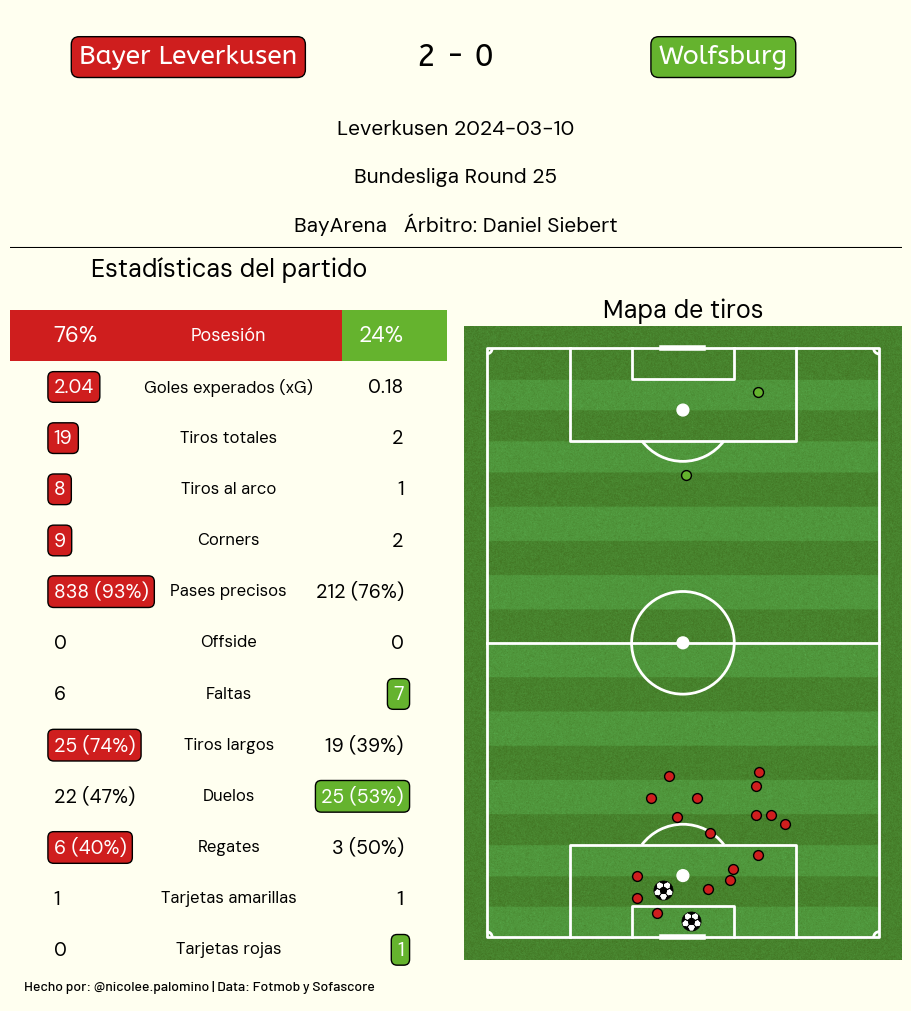

In [583]:
fig = plt.figure(figsize=(9,10),constrained_layout=True)
gs = fig.add_gridspec(nrows=4,ncols=4)
fig.set_facecolor('ivory')

# informacion
ax1 = fig.add_subplot(gs[:1, :4])
fh.get_information_horizontal(ax1, equipos, cuerpo, color_home, color_away, home_name, away_name, score_home, score_away, city_stadium, league, round_match, day, stadium, referee)
fh.color_ax_vertical(ax1)
ax1.axhline(.0, color='black', linestyle='solid')
fh.sacar_spines(ax1)

ax2 = fig.add_subplot(gs[1:4, :2])
ax2.set_title('Estadísticas del partido', fontproperties=cuerpo.prop, size=18) 
fh.get_estadisticas_match_vertical(ax2, widths_possession, posesion, xgs_match, shots_match, targets_match, corners_match, pass_match, offsides_match, foul_match, ball_long, won_duel, dribble_match, yellow_cards, red_cards, total_value, cuerpo, colores, color_home, color_away)
fh.color_ax_vertical(ax2)
fh.sacar_spines(ax2)

# player of the match
ax4 = fig.add_subplot(gs[1:4, 2:4])
ax4.set_title('Mapa de tiros', fontproperties=cuerpo.prop, size=18)
fh.get_campo_tiros_vertical(ax4, coord_x_goal_home, coord_y_goal_home, coord_x_nogoal_home, coord_y_nogoal_home, coord_x_goal_away, coord_y_goal_away, coord_x_nogoal_away, coord_y_nogoal_away, color_home, color_away)
fh.color_ax_vertical(ax4)
fh.sacar_spines(ax4)

plt.figtext(0.02, .015, f'Hecho por: @nicolee.palomino | Data: Fotmob y Sofascore', ha='left', fontproperties=pie.prop, size=10)
plt.savefig(f'../img/bundesliga/{home_name}_{away_name}_vertical.png', dpi=300)

# Facebook

## 15:9

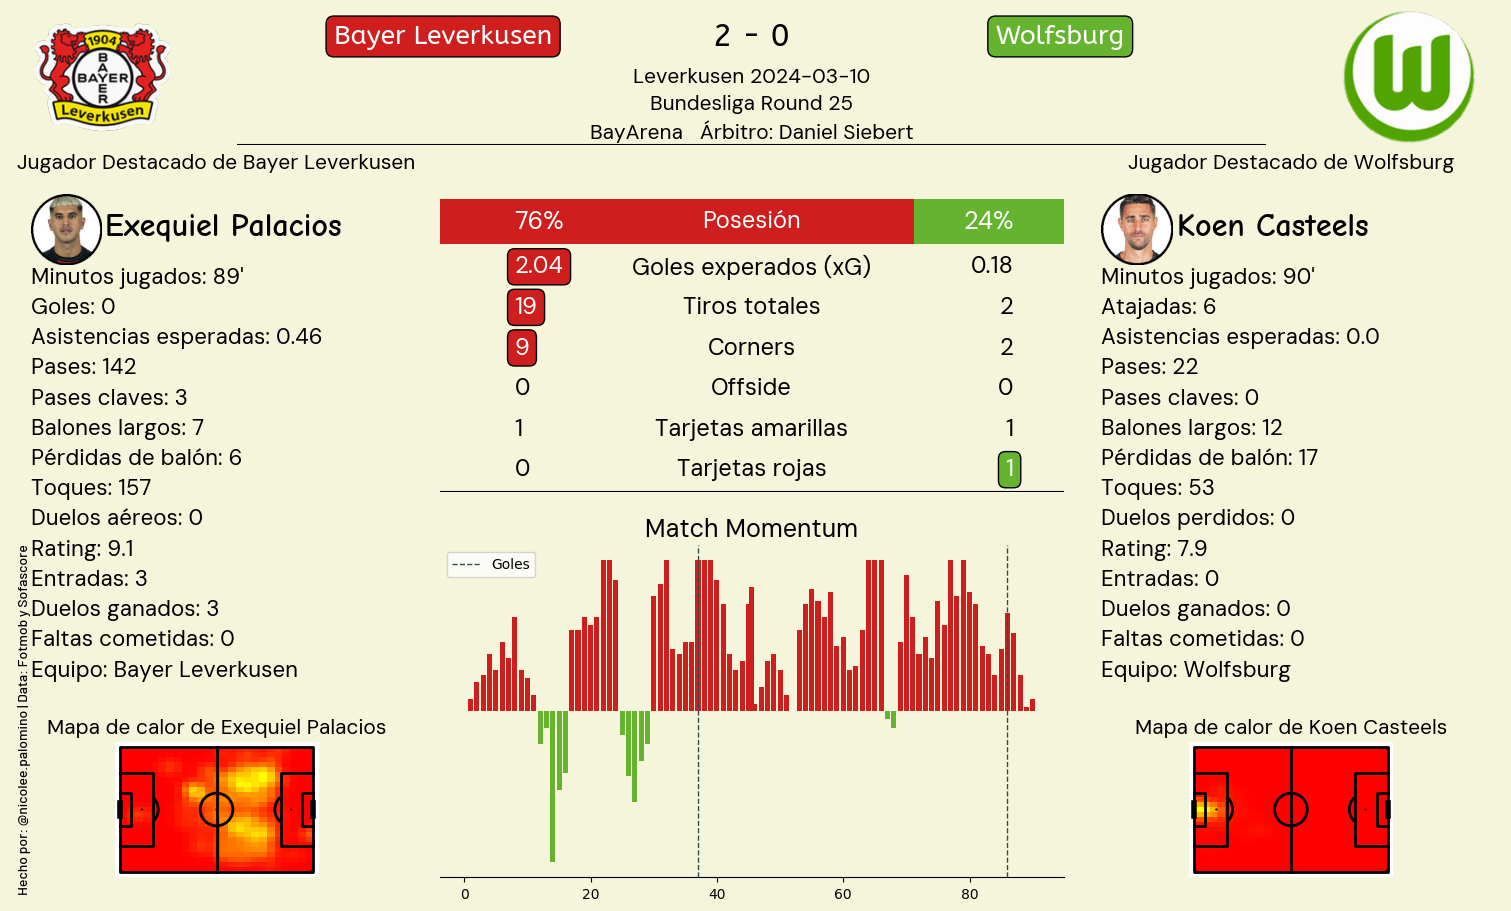

In [584]:
fig = plt.figure(figsize=(15,9),constrained_layout=True)
gs = fig.add_gridspec(nrows=5,ncols=7)
fig.set_facecolor('beige')

# Escudo local
ax1 = fig.add_subplot(gs[:1, :1])
fh.get_image_escudo(ax1, image_home_url)
fh.color_ax(ax1)
fh.sacar_spines(ax1)

# Informacion del partido
ax2 = fig.add_subplot(gs[:1, 1:6])
fh.get_information_horizontal(ax2, equipos, cuerpo, color_home, color_away, home_name, away_name, score_home, score_away, city_stadium, league, round_match, day, stadium, referee)
fh.color_ax(ax2)
ax2.axhline(.0, color='black', linestyle='solid')
fh.sacar_spines(ax2)

# Escudo visitante
ax5 = fig.add_subplot(gs[:1, 6:7])
fh.get_image_escudo(ax5, image_away_url)
fh.color_ax(ax5)
fh.sacar_spines(ax5)

# Jugador local
ax6 = fig.add_subplot(gs[1:4, :2])
ax6.set_title(f'Jugador Destacado de {home_name}', fontproperties=cuerpo.prop, size=15)
ax6_inset = ax6.inset_axes([.05, 0.82, 0.17, 0.15])
fh.get_jugador_destacado_local(ax6, info_player_home, nombre, cuerpo)
# fh.get_jugador_destacado_arquero(ax6, info_player_home, nombre, cuerpo)
fh.get_image_jug(ax6_inset, image_player_home)
fh.color_ax(ax6)
fh.color_ax(ax6_inset)
fh.sacar_spines(ax6)
fh.sacar_spines(ax6_inset)

# Estadisticas del partido
ax7 = fig.add_subplot(gs[1:3, 2:5])
fh.get_estadisticas_match(ax7, cuerpo, widths_possession, posesion, colores, xgs_match, shots_match, corners_match, offsides_match, yellow_cards, red_cards, colors[0], colors[1], total_value)
fh.color_ax(ax7)
fh.sacar_spines(ax7)
ax7.axhline(-.7, color='black', linestyle='solid')

# Jugador visitante
ax8 = fig.add_subplot(gs[1:4, 5:7])
ax8.set_title(f'Jugador Destacado de {away_name}', fontproperties=cuerpo.prop, size=15)
ax8_inset = ax8.inset_axes([.05, 0.82, 0.17, 0.15])
# fh.get_jugador_destacado_visit(ax8, info_player_away, nombre, cuerpo)
fh.get_jugador_destacado_arquero(ax8, info_player_away, nombre, cuerpo)
fh.get_image_jug(ax8_inset, image_player_away)
fh.color_ax(ax8)
fh.color_ax(ax8_inset)
fh.sacar_spines(ax8)
fh.sacar_spines(ax8_inset)

# mapa de tiros
ax9 = fig.add_subplot(gs[3:5, 2:5])
ax9.set_title('Match Momentum', fontproperties=cuerpo.prop, size=18)
# ax9.set_title('xG Flow Chart', fontproperties=cuerpo.prop, size=18)
fh.get_match_momentum_horizontal(ax9, df_goles_match, match_momentum_local, match_momentum_visit, color_home, color_away)
# fh.get_xg_flow_chart(ax9, home_xG, away_xG, home_name, away_name, goals_home, goals_away, color_home, color_away)
fh.color_ax(ax9)

# mapa de calor local
ax10 = fig.add_subplot(gs[4:5, :2])
ax10.set_title(f'Mapa de calor de {info_player_home[0]}', fontproperties=cuerpo.prop, size=15)
fh.get_mapa_calor(ax10, heatmap_home)

# mapa de calor visita
ax11 = fig.add_subplot(gs[4:5, 5:7])
ax11.set_title(f'Mapa de calor de {info_player_away[0]}', fontproperties=cuerpo.prop, size=15)
fh.get_mapa_calor(ax11, heatmap_away)

plt.figtext(.008, .015, f'Hecho por: @nicolee.palomino | Data: Fotmob y Sofascore', ha='left', fontproperties=pie.prop, size=10, rotation=90)
plt.savefig(f'../img/bundesliga/{home_name}_{away_name}_2.png', dpi=300)

## 9:15

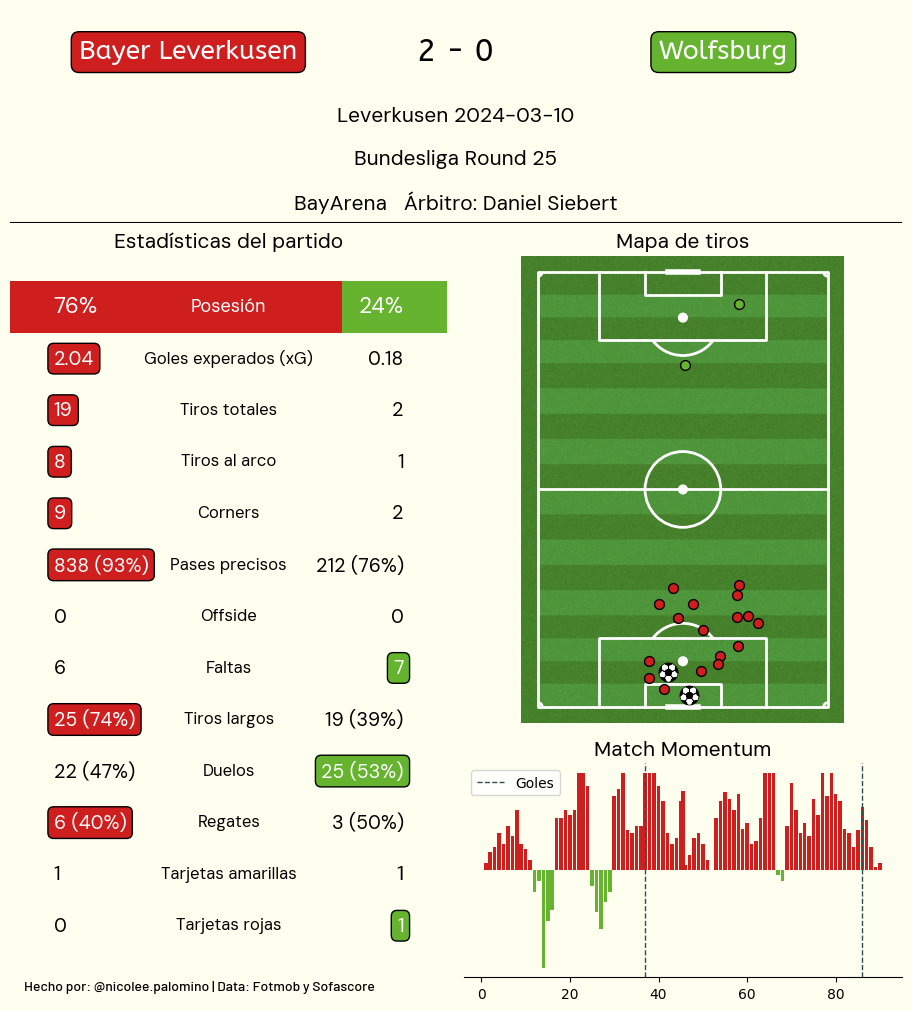

In [585]:
fig = plt.figure(figsize=(9,10),constrained_layout=True)
gs = fig.add_gridspec(nrows=4,ncols=4)
fig.set_facecolor('ivory')

ax1 = fig.add_subplot(gs[:1, :4])
fh.get_information_horizontal(ax1, equipos, cuerpo, color_home, color_away, home_name, away_name, score_home, score_away, city_stadium, league, round_match, day, stadium, referee)
fh.color_ax_vertical(ax1)
ax1.axhline(.0, color='black', linestyle='solid')
fh.sacar_spines(ax1)

ax2 = fig.add_subplot(gs[1:4, :2])
ax2.set_title('Estadísticas del partido', fontproperties=cuerpo.prop, size=15) 
fh.get_estadisticas_match_vertical(ax2, widths_possession, posesion, xgs_match, shots_match, targets_match, corners_match, pass_match, offsides_match, foul_match, ball_long, won_duel, dribble_match, yellow_cards, red_cards, total_value, cuerpo, colores, color_home, color_away)
fh.color_ax_vertical(ax2)
fh.sacar_spines(ax2)

ax4 = fig.add_subplot(gs[1:3, 2:4])
ax4.set_title('Mapa de tiros', fontproperties=cuerpo.prop, size=15)
fh.get_campo_tiros_vertical(ax4, coord_x_goal_home, coord_y_goal_home, coord_x_nogoal_home, coord_y_nogoal_home, coord_x_goal_away, coord_y_goal_away, coord_x_nogoal_away, coord_y_nogoal_away, color_home, color_away)
fh.color_ax_vertical(ax4)
fh.sacar_spines(ax4)

ax8 = fig.add_subplot(gs[3:4, 2:4])
ax8.set_title('Match Momentum', fontproperties=cuerpo.prop, size=15) 
# ax8.set_title('xG Flow Chart', fontproperties=cuerpo.prop, size=15) 
fh.get_match_momentum_horizontal(ax8, df_goles_match, match_momentum_local, match_momentum_visit, color_home, color_away)
# fh.get_xg_flow_chart(ax8, home_xG, away_xG, home_name, away_name, goals_home, goals_away, color_home, color_away)
fh.color_ax_vertical(ax8)

plt.figtext(0.02, .015, f'Hecho por: @nicolee.palomino | Data: Fotmob y Sofascore', ha='left', fontproperties=pie.prop, size=10)
plt.savefig(f'../img/bundesliga/{home_name}_{away_name}_vertical_2.png', dpi=300)